## Compute Phase Encoding

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
#%matplotlib notebook
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2
from brainpipe.system import study
from brainpipe.feature import power, amplitude, sigfilt, phase, PLF
from brainpipe.visual import *

from brainpipe.statistics import *
from os import path

### Check all files dimensions

In [6]:
st = study('Olfacto')

files = st.search('_bipo_sel.npz', folder='database/TS_E_all_by_odor_th40_art400_30_250_Good_Bad_EpiScore_Expi/')
for fi in files:
    loadname = path.join(st.path, 'database/TS_E_all_by_odor_th40_art400_30_250_Good_Bad_EpiScore_Expi/', fi)
    mat = np.load(loadname)
    x = np.load(loadname)['x']
    print (fi, x.shape, mat.files)

-> Olfacto loaded
CHAF_odor_bad_bipo_sel.npz (94, 2816, 33) ['channel', 'label', 'xyz', 'x', 'sf']
CHAF_odor_good_bipo_sel.npz (94, 2816, 33) ['channel', 'label', 'xyz', 'x', 'sf']
FERJ_odor_bad_bipo_sel.npz (14, 2816, 26) ['channel', 'label', 'xyz', 'x', 'sf']
FERJ_odor_good_bipo_sel.npz (14, 2816, 30) ['channel', 'label', 'xyz', 'x', 'sf']
LEFC_odor_bad_bipo_sel.npz (139, 2816, 23) ['channel', 'label', 'xyz', 'x', 'sf']
LEFC_odor_good_bipo_sel.npz (139, 2816, 35) ['channel', 'label', 'xyz', 'x', 'sf']
MICP_odor_bad_bipo_sel.npz (67, 2816, 45) ['channel', 'label', 'xyz', 'x', 'sf']
MICP_odor_good_bipo_sel.npz (67, 2816, 33) ['channel', 'label', 'xyz', 'x', 'sf']
PIRJ_odor_bad_bipo_sel.npz (48, 2816, 35) ['channel', 'x', 'label', 'sf', 'xyz']
PIRJ_odor_good_bipo_sel.npz (48, 2816, 39) ['channel', 'x', 'label', 'sf', 'xyz']
SEMC_odor_bad_bipo_sel.npz (64, 2816, 18) ['channel', 'x', 'label', 'sf', 'xyz']
SEMC_odor_good_bipo_sel.npz (64, 2816, 23) ['channel', 'x', 'label', 'sf', 'xyz']
VA

## Compute Phase locking factor
    Consistency of phase across trials locked to an event's onset

-> Olfacto loaded
--> compute phase on :  LEFC_odor_bad_bipo_sel.npz data (139, 2816, 23) npts 2816 ntrials 23 nelec 139


/home/karim/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/karim/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


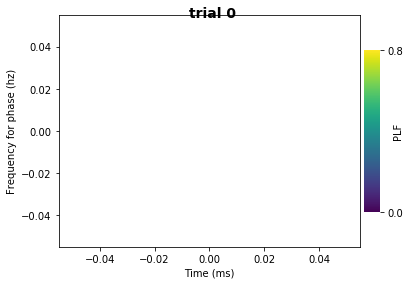

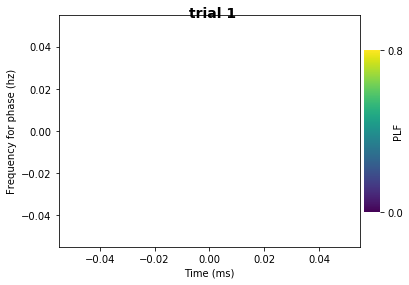

Process ForkPoolWorker-15:
Process ForkPoolWorker-14:
Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/karim/anaconda3/lib/python3.5/site-packages/joblib/pool.py", line 357, in get
    racquire()
  File "/home/karim/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kw

KeyboardInterrupt: 

In [7]:
st = study('Olfacto')
subjects = ['LEFC'] #'FERJ','MICP','VACJ','SEMC','LEFC','PIRJ','CHAF'
conds = ['bad', 'good']

# Define phase settings 
f = (0.1,13.,0.2,0.1)
fname = ['VLFC','delta','theta', 'alpha']

for su in subjects:
    for cond in conds:
        # Load file :
        fi = su+'_odor_'+cond+'_bipo_sel.npz'
        loadname = path.join(st.path, 'database/TS_E_all_by_odor_th40_art400_30_250_Good_Bad_EpiScore_Expi/', fi)
        mat = np.load(loadname)
        x, sf = mat['x'], 512.
        n_elec, npts, n_trials = x.shape
        print ('--> compute phase on : ', fi, 'data', x.shape, 'npts', npts, 'ntrials',n_trials, 'nelec', n_elec)              
        
        for elec in range(n_elec):
            x_elec = x[elec,:,:][np.newaxis]
            step = 5500/ x_elec.shape[0]
            time = np.arange(0, 5500, step)
            # Define and save power objects :
            PLF0bj = PLF(sf, npts=npts, f=f, method='hilbert',width=358, step=51, time=time)
            x_PLF, pval = PLF0bj.get(x_elec,n_jobs=5)
#             x_PLF = np.squeeze(x_PLF)
            # Plot both PLF in the same figure for good and bad
            fig = plt.figure(1,figsize=(6,4))
            title = 'trial '+str(elec)
            fig, allax = PLF0bj.plot2D(fig, x_PLF, cmap='viridis', xlabel='Time (ms)', 
                xvec=PLF0bj.xvec, yvec=PLF0bj.yvec, ylabel='Frequency for phase (hz)', 
                figtitle=title, cblabel='PLF', vmin=0.,vmax=0.8)
            plt.show()
            

In [ ]:
 kwargs = {}
        kwargs['f'], kwargs['fname'] = f, fname
        kwargs['labels'], kwargs['channels'], kwargs['xyz'] = mat['label'], mat['channel'], mat['xyz']
        kwargs['PLF'],  kwargs['PLF_pval']= PLF0bj.get(x,n_jobs=5)
        print('shape of PLF for one elec -->', kwargs['PLF'].shape)
        save_phase = path.join(st.path, 'feature/7_Phase_E1E2_Odor_Good_Bad_EpiScore_Expi/', fi.replace('.npz', '_PLF.npz'))
        np.savez(save_phase, **kwargs)
        del kwargs['PLF'],  kwargs['PLF_pval'], kwargs['fname']
        del kwargs, x, sf, n_elec, n_trials

### Check all phase files dimensions

In [3]:
st = study('Olfacto')
files = st.search('_sel_PLF.npz', folder='feature/7_Phase_E1E2_Odor_Good_Bad_EpiScore_Expi/')
for fi in files:
    loadname = path.join(st.path, 'feature/7_Phase_E1E2_Odor_Good_Bad_EpiScore_Expi/', fi)
    mat = np.load(loadname)
    x = np.load(loadname)['PLF']
    # nfreq, nelec, nwin, ntrials
    print (fi, x.shape)
    print(mat.files)

-> Olfacto loaded
CHAF_odor_bad_bipo_sel_PLF.npz (94, 12, 49)
['f', 'PLF', 'labels', 'channels', 'fname', 'PLF_pval', 'xyz']
CHAF_odor_good_bipo_sel_PLF.npz (94, 12, 49)
['f', 'PLF', 'labels', 'channels', 'fname', 'PLF_pval', 'xyz']
FERJ_odor_bad_bipo_sel_PLF.npz (14, 12, 49)
['channels', 'fname', 'f', 'labels', 'PLF', 'xyz', 'PLF_pval']
FERJ_odor_good_bipo_sel_PLF.npz (14, 12, 49)
['channels', 'fname', 'f', 'labels', 'PLF', 'xyz', 'PLF_pval']
LEFC_odor_bad_bipo_sel_PLF.npz (139, 12, 49)
['f', 'PLF', 'labels', 'channels', 'fname', 'PLF_pval', 'xyz']
LEFC_odor_good_bipo_sel_PLF.npz (139, 12, 49)
['f', 'PLF', 'labels', 'channels', 'fname', 'PLF_pval', 'xyz']
MICP_odor_bad_bipo_sel_PLF.npz (67, 12, 49)
['channels', 'fname', 'f', 'labels', 'PLF', 'xyz', 'PLF_pval']
MICP_odor_good_bipo_sel_PLF.npz (67, 12, 49)
['channels', 'fname', 'f', 'labels', 'PLF', 'xyz', 'PLF_pval']
PIRJ_odor_bad_bipo_sel_PLF.npz (48, 12, 49)
['f', 'PLF', 'labels', 'channels', 'fname', 'PLF_pval', 'xyz']
PIRJ_odor_goo

### Plot all phases for all electrodes    
    Ploting the PLF for good and bad conditions with stats

In [ ]:
#%matplotlib notebook
st = study('Olfacto')
path_phase = path.join(st.path, 'feature/7_Phase_E1E2_Odor_Good_Bad_EpiScore_Expi/')
path_save = path.join(path_phase, 'figures_PLF/')
subjects = ['FERJ','MICP','VACJ','SEMC','LEFC','PIRJ','CHAF']

su = 'LEFC'
freq = 0
elec = 3

#load big files (PLF: nelec, nfreq, npts)
mat_good = np.load(path_phase+su+'_odor_good_bipo_sel_PLF.npz')
good_phase, pvals_good = mat_good['PLF'],mat_good['PLF_pval']
print(good_phase.shape, pvals_good.shape)
nelecs, nfreq = good_phase.shape[0], good_phase.shape[1]
mat_bad = np.load(path_phase+su+'_odor_bad_bipo_sel_PLF.npz')
bad_phase, pvals_bad = mat_bad['PLF'], mat_bad['PLF_pval']
freq_names, channels, labels = mat_good['fname'], mat_good['channels'], mat_good['labels']

# files for one elec (shape: npts)
print('plotting --> ', su, freq_names[freq],'elec', elec,'/',nelecs)
elec_good_phase = good_phase[elec,freq,:]
elec_bad_phase = bad_phase[elec,freq,:]
pval_good, pval_bad = pvals_good[elec,freq,:], pvals_bad[elec,freq,:]
freq_name, label, channel = freq_names[freq], labels[elec], channels[elec]
print('elec good shape', elec_good_phase.shape, 'elec bad shape', elec_bad_phase.shape)

# Plot both PLF in the same figure for good and bad
fig = plt.figure(1,figsize=(6,4))
step = 5500/ elec_good_phase.shape[0]
time = np.arange(0, 5500, step)
title = 'trial '
fig, allax = PLF0bj.plot2D(fig, elec_good_phase, cmap='viridis', xlabel='Time (ms)', 
            ylabel='Frequency for phase (hz)', figtitle=title, cblabel='PLF')
            

In [ ]:
time = 1000 * np.arange(plf_all.shape[0]) / sf #to set the 0 in your TF
print ('Time points: ', len(time),min(time), max(time))
tfObj = TF(sf, bad.shape[0], f=f, time=time, width=width, step=step,baseline=baseline, norm=3)
xtf_bad, _ = tfObj.get((bad), statmeth=None, n_perm=n_perm, maxstat=False, tail=2, metric='m_center')
xtf_good, _ = tfObj.get((good), statmeth=None, n_perm=n_perm, maxstat=False, tail=2, metric='m_center')
print ('TF size :', xtf_bad.shape, xtf_good.shape)
xtf_bad, xtf_good = 100*np.swapaxes(xtf_bad,0,1), 100*np.swapaxes(xtf_good,0,1)

# plot both TF in the same figure
xtf_all = np.concatenate((xtf_bad, xtf_good), axis=0)
print ('TF size :', xtf_bad.shape,xtf_good.shape)
fig = plt.figure(elec, figsize=(10, 4))
title = su+' Elec('+str(elec)+') '+channel+' '+label+' Bad/Good'
fig, allax = tfObj.plot2D(fig, xtf_all, cmap='viridis', xvec=tfObj.xvec,
             yvec=tfObj.yvec, xlabel='Time (ms)', vmin=-100, vmax=100, ycb=-20,
             ylabel='Frequency (hz)', figtitle=title, title=['Bad Odors', 'Good odors'],
             cblabel='Power modulations (%)', pltype='imshow', resample=(0.1, 0.1),
            sharex=False, sharey=False, subdim=(1,2), subspace={'top':0.8})
for k in allax:
    addLines(k, vLines=lines, vColor=['firebrick']*2, vWidth=[2]*2)
#Save all your plots
fname = (path2save+su+'_TF_elec_('+str(elec)+')_'+channel+'_'+label+'_Bad-Good.png')
print (fname)
fig.savefig(fname, dpi=300, bbox_inches='tight')
plt.close()